In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_excel('SuperStoreData.xlsx')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
categories = data.groupby(by="Category").sum()

categories

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_6444\3094702229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categories = data.groupby(by="Category").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


In [5]:
value = categories.Profit
label = categories.Profit.index

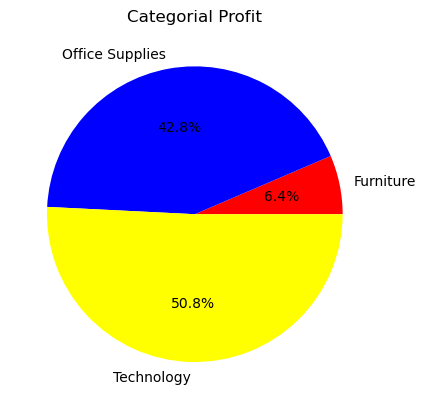

In [9]:
plt.pie(value, labels=label,colors=["red", "blue", "yellow"], autopct="%1.1f%%")

plt.title("Categorial Profit")
plt.show()

In [7]:
subcategories = data.groupby(by="Sub-Category").sum()

subcategories

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_6444\1915698253.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subcategories = data.groupby(by="Sub-Category").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,
Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357
Appliances,2407754,25250538,107532.1610,1729,77.60,18138.0054
Art,3920109,43329658,27118.7920,3000,59.60,6527.7870
Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633
Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560
Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663
Copiers,355661,3873477,149528.0300,234,11.00,55617.8249
Envelopes,1207903,13325731,16476.4020,906,20.40,6964.1767
Fasteners,1017287,12506063,3024.2800,914,17.80,949.5182


In [10]:
labels = subcategories.Profit.index
values = subcategories.Profit

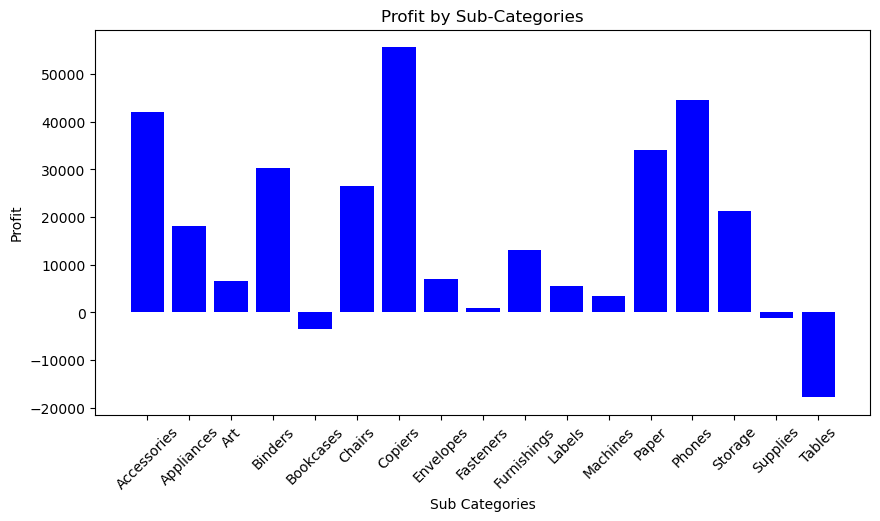

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color="blue")
plt.xlabel("Sub Categories")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.title("Profit by Sub-Categories")
plt.show()

In [14]:
ship_mode = data.groupby(by="Ship Mode").sum()

ship_mode

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_6444\426417472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ship_mode = data.groupby(by="Ship Mode").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,
First Class,7498535,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,2784998,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,9601997,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,30059485,327908460,1.358216e+06,22797,955.02,164088.7875


In [15]:
labels = ship_mode.Profit.index
values = ship_mode.Profit

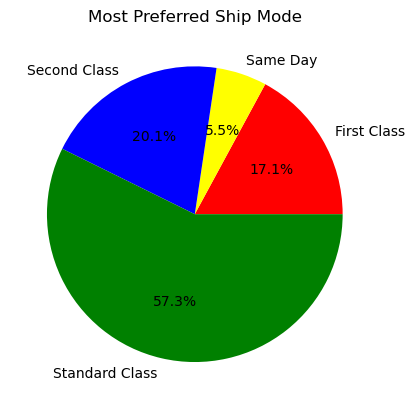

In [16]:
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["red", 'yellow', "blue", 'green'])
plt.title("Most Preferred Ship Mode")
plt.show()

In [18]:
segments = data.groupby(by="Segment").sum()

segments

C:\Users\Gabriel Johnson\AppData\Local\Temp\ipykernel_6444\1101146108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segments = data.groupby(by="Segment").sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


In [19]:
values = segments.Profit
labels = segments.Profit.index

In [ ]:
plt.pie(values, labels=labels, colors=['red', 'yellow', 'green'], autopct="%1.1f%%")
plt